# Задание по блоку "Python-13. Визуализация данных"

In [591]:
# загрузим библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.express as px

## Данные об оттоке клиентов некоторого банка.

In [592]:
churn_data = pd.read_csv('data/churn.csv')
display(churn_data.head())
display(churn_data.info())


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

## Столбцы таблицы:

1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2. CustomerId — идентификатор клиента
3. Surname — фамилия клиента
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5.  — страна клиента (банк международный)
6. Gender — пол клиента
7. Age — возраст клиента
8. Tenure — сколько лет клиент пользуется услугами банка
9. Balance — баланс на счетах клиента в банке
10. NumOfProducts — количество услуг банка, которые приобрёл клиент
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13. EstimatedSalary — предполагаемая заработная плата клиента
14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент

## Цель

Установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

## Подготовка данных

In [593]:
# Посмотрим сколько уникальных значений в каждом атрибуте
unique_list = []
for col in churn_data.columns:
    item = (col, churn_data[col].nunique(),churn_data[col].dtypes) 
    unique_list.append(item) 
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Gender,2,object
1,HasCrCard,2,int64
2,IsActiveMember,2,int64
3,Exited,2,int64
4,Geography,3,object
5,NumOfProducts,4,int64
6,Tenure,11,int64
7,Age,70,int64
8,CreditScore,460,int64
9,Surname,2932,object


In [594]:
# Сделаем значения типа object с небольшим количеством значений категориями
# хотя не знаю пока важно ли это для визуализации
churn_data['Gender'] = churn_data['Gender'].astype('category') 
churn_data['Geography'] = churn_data['Geography'].astype('category') 
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('category') 
churn_data['Exited'] = churn_data['Exited'].astype('category') 
churn_data['Exited']  = churn_data['Exited'].cat.rename_categories({
    0: 'лояльный',
    1: 'ушел',
})
display(churn_data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,ушел
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,лояльный
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,ушел
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,лояльный
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,лояльный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,лояльный
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,лояльный
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,ушел
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,ушел


In [595]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,199992.480000


## ЗАДАНИЯ

__9.1.__ Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Для сравнения категорий удобно использовать __столбчатую диаграмму__.
Попробуем ее сделать средствами разных модулей.

In [596]:
# подготовим данные
exited_data = churn_data['Exited'].value_counts()
display(exited_data)

лояльный    7963
ушел        2037
Name: Exited, dtype: int64

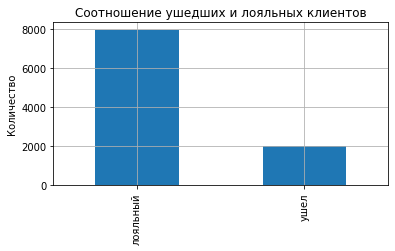

In [597]:
# pandas 
exited_data.plot(
    kind='bar',
    grid=True,
    figsize=(6, 3),
    ylabel='Количество',
    title= 'Соотношение ушедших и лояльных клиентов' #заголовок
);

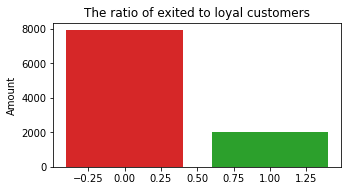

In [541]:
# matplotlib
fig = plt.figure(figsize=(4, 2))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('The ratio of exited to loyal customers') 
bar_colors = ['tab:red', 'tab:green'] 
axes.set_ylabel('Amount') 
axes.bar(
    x=exited_data.index,
    height=exited_data,
    color=bar_colors
 );

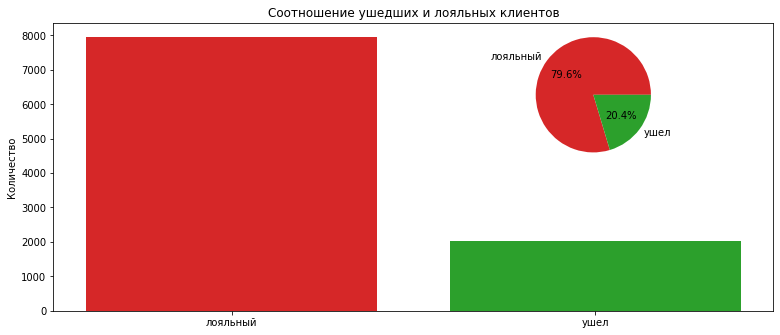

In [598]:
# для тренировки сделаем вложенный круговую диаграмму на фоне столбчатой
#визуализация главного графика
fig = plt.figure(figsize=(10, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
bar_colors = ['tab:red', 'tab:green'] 
main_axes.bar(x = exited_data.index, 
              height = exited_data,
              color=bar_colors);
main_axes.set_ylabel('Количество')
main_axes.set_title('Соотношение ушедших и лояльных клиентов')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.5, 0.5, 0.5, 0.5])
insert_axes.pie(exited_data,
                labels=list(exited_data.index),
                autopct='%0.1f%%',
                colors=bar_colors);


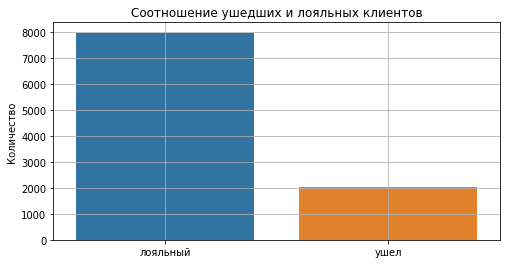

In [599]:
# seaborn
fig = plt.figure(figsize=(8, 4))
barplot=sns.barplot(y=exited_data, 
            x=exited_data.index, 
            orient='v',
            )
barplot.set_title('Соотношение ушедших и лояльных клиентов');
barplot.set_ylabel('Количество');
barplot.grid()

In [618]:
# Plotly
#строим график
fig = px.bar(
    exited_data, #датафрейм
    y="Exited", #ось y
    text = 'Exited', #текст на столбцах
    orientation='v', #ориентация графика
    height=400, #высота
    width=500, #ширина
    title='Соотношение ушедших и лояльных клиентов', #заголовок

)
#отображаем его
fig.show()

__Вывод: Ушедших приблизительно 5-я часть от всех клиентов в выборке.__

__9.2.__ Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
Опишите распределение и сделайте выводы.

Рекомендуемые варианты диаграмм: Гистограмма или ящик с усами

In [601]:
# Отфильтруем данные
balances= churn_data[churn_data['Balance']>2500]

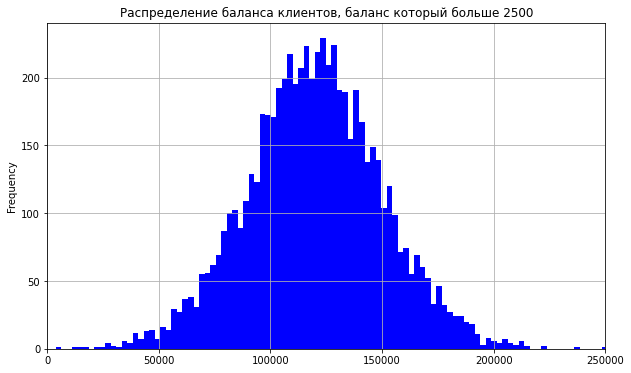

In [619]:
# Построим гистаграмму средствами pandas
balances['Balance'].plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение баланса клиентов, баланс который больше 2500',
    grid = True,
    color = 'blue',
    bins=100,
    xlim=(0,250000)
);

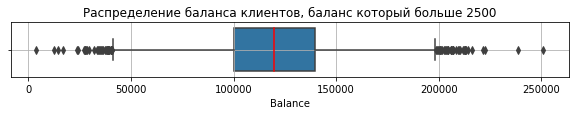

In [620]:
# Построим пример диаграмму "ящик с усами" средствами seaborn
fig = plt.figure(figsize=(10, 1))
boxplot = sns.boxplot(
    data=balances,
    x='Balance',
    medianprops={"color": "red"},
    width=0.8
)
boxplot.set_title('Распределение баланса клиентов, баланс который больше 2500');
boxplot.grid()

Выводы: Распределение баланса в этой групе клиентов ноормальное. Большинство клиентов с балансом от 100 т. до 150 т. долларов.


__9.3.__ Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

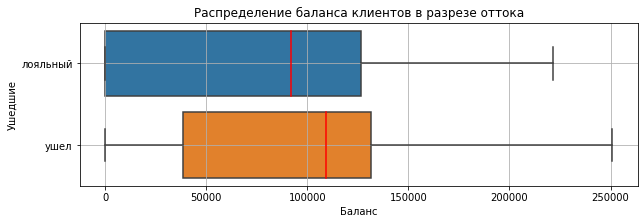

In [621]:
# Построим пример диаграмму "ящики с усами" средствами seaborn
fig = plt.figure(figsize=(10, 3))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    medianprops={"color": "red"},
    #orient='h',
    width=0.8
)
boxplot.set_title('Распределение баланса клиентов в разрезе оттока');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Ушедшие');
boxplot.grid()

Text(0.5, 1.0, 'Распределение баланса клиентов в разрезе оттока')

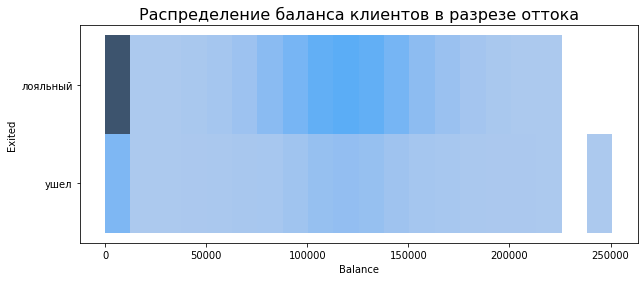

In [622]:
# попробуем гистаграмму средствами seaborn
fig = plt.subplots(figsize=(10, 4))
ax=sns.histplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    bins=20,
    kde=True,
);
ax.set_title('Распределение баланса клиентов в разрезе оттока', fontsize=16)


(0.0, 4e-05)

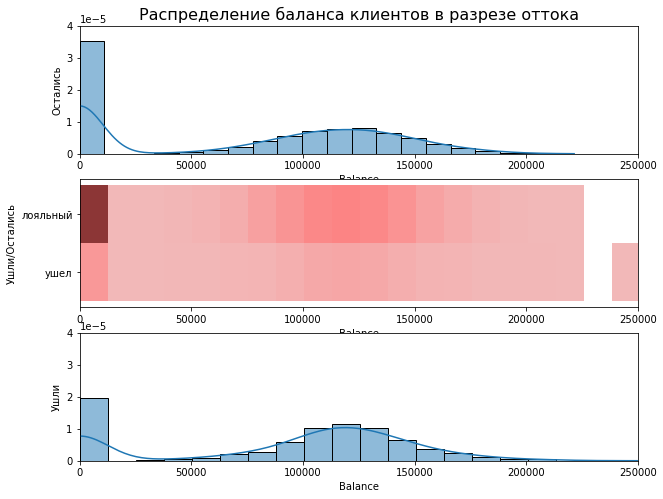

In [624]:
# попробуем совместить гистаграммы средствами seaborn
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
sns.histplot(
    data=churn_data[churn_data['Exited']=='лояльный'],
    x='Balance',
    bins=20,
    kde=True,
    ax=axes[0],stat="density", common_norm=False
);
sns.histplot(
    data=churn_data[churn_data['Exited']=='ушел'],
    x='Balance',
    bins=20,
    kde=True,
    ax=axes[2],stat="density", common_norm=False
);
sns.histplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    bins=20,
    color='red',
    ax=axes[1],stat="density", common_norm=False
);
axes[0].set_title('Распределение баланса клиентов в разрезе оттока', fontsize=16)
axes[0].set_ylabel('Остались')
axes[1].set_ylabel('Ушли/Остались')
axes[2].set_ylabel('Ушли')
axes[0].set_xlim(0,250000)
axes[0].set_ylim(0,0.00004)
axes[1].set_xlim(0,250000)
axes[2].set_xlim(0,250000)
axes[2].set_ylim(0,0.00004)

Гистограммы не информативны.

In [625]:
# для сравнения вариант из Plotly
fig = px.box(
    data_frame=churn_data, #датафрейм
    y="Exited", #ось x
    x="Balance", #ось y
    color='Exited', #расцветка в зависимости от страны
    orientation='h', #ориентация графика
    height=300, #высота
    width=600, #ширина
    title='Распределение баланса клиентов в разрезе оттока' #заголовок
)
fig.show()

Вывод: Уходят клиенты с большим остатком. Возможно клиентов не устраивает доход от размещения средств.

__9.4.__ Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [626]:
# вариант из Plotly
fig = px.box(
    data_frame=churn_data, #датафрейм
    y="Exited", #ось x
    x="Age", #ось y
    color='Exited', #расцветка в зависимости от страны
    orientation='h', #ориентация графика
    height=300, #высота
    width=600, #ширина
    title='Распределение возраста клиентов в разрезе оттока' #заголовок
)
fig.show()

In [627]:
# группировка данных
age_gr=churn_data.pivot_table(
    values='Surname',
    index='Age',
    columns='Exited',
    aggfunc ='count',
    fill_value=0
)
display(age_gr)

Exited,лояльный,ушел
Age,,
18,20,2
19,26,1
20,38,2
21,50,3
22,72,12
...,...,...
83,1,0
84,1,1
85,1,0


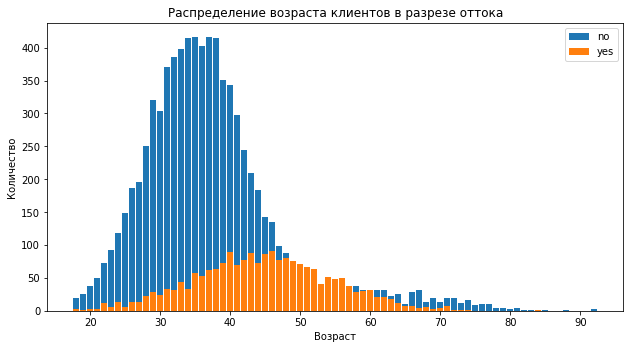

In [628]:
# столчатая диаграмма по двум значениям средствами matplotlib

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('') 
axes.set_ylabel('Amount') 
ax1=axes.bar(
    x=age_gr.index,
    height=age_gr['лояльный'],
    label='no'
)
ax2=axes.bar(
    x=age_gr.index,
    height=age_gr['ушел'],
    label='yes'
 );

axes.set_ylabel('Количество')
axes.set_xlabel('Возраст')
axes.set_title('Распределение возраста клиентов в разрезе оттока')
axes.legend()

plt.show()

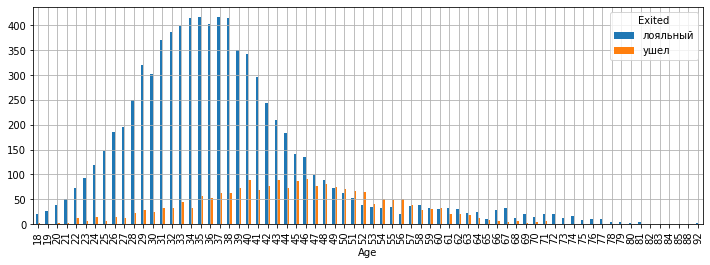

In [629]:
# вариант средствами pandas
age_gr.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

Вывод: Отток смещен в сторону возрастных клиентов. Следует обратить внимание на клиентов в возрасте от 35 до 55 лет.

__9.5.__ Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


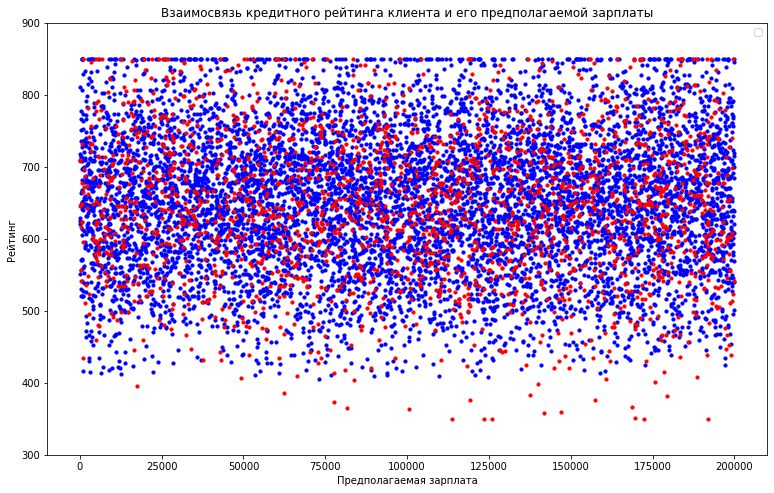

In [630]:
# matplotlib
fig = plt.figure(figsize=(10, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=churn_data[churn_data['Exited']=='лояльный']['EstimatedSalary'], 
    y=churn_data[churn_data['Exited']=='лояльный']['CreditScore'], 
    s=10,
    marker='o',
    c = 'blue'
);
axes.scatter(
    x=churn_data[churn_data['Exited']=='ушел']['EstimatedSalary'], 
    y=churn_data[churn_data['Exited']=='ушел']['CreditScore'], 
    s=10,
    marker='o',
    c = 'red'
);
axes.set_ylabel('Рейтинг')
axes.set_ylim(300,900)
axes.set_xlabel('Предполагаемая зарплата')
axes.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
axes.legend()
plt.show()

Вывод: явной взаимосвязи не вижу. Только если это: Клиенты с рейтингом ниже 400 уходят. Ну и хорошо.

__9.6.__ Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [632]:
# подготовим данные
gender_data = churn_data[churn_data['Exited']=='ушел']['Gender'].value_counts()
display(gender_data)

Female    1139
Male       898
Name: Gender, dtype: int64

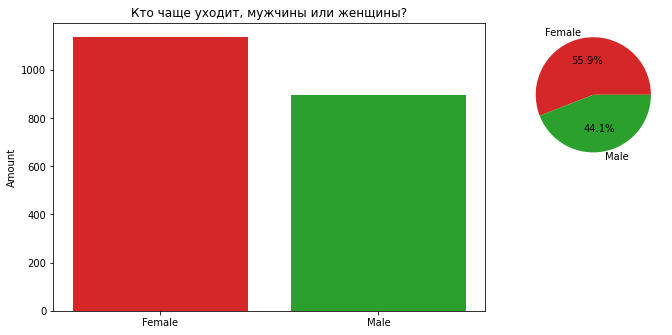

In [633]:
# matplotlib
# вложенная круговую диаграмма на фоне столбчатой

fig = plt.figure(figsize=(10, 4))
main_axes = fig.add_axes([0, 0, 0.6, 1])
bar_colors = ['tab:red', 'tab:green'] 
main_axes.bar(x = gender_data.index, 
              height = gender_data,
              color=bar_colors);
main_axes.set_ylabel('Amount')
main_axes.set_title('Кто чаще уходит, мужчины или женщины?')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.5, 0.5, 0.5, 0.5])
insert_axes.pie(gender_data,
                labels=list(gender_data.index),
                autopct='%0.1f%%',
                colors=bar_colors);


Вывод: Женщины.

__9.7.__ Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [634]:
# группировка данных
nop_gr=churn_data.pivot_table(
    values='Surname',
    index='NumOfProducts',
    columns='Exited',
    aggfunc ='count',
    fill_value=0
)
display(nop_gr)
# приведем к проценту
nop_gr['sum']=nop_gr['лояльный']+nop_gr['ушел']
nop_gr['лояльный']=nop_gr['лояльный']/nop_gr['sum']*100
nop_gr['ушел']=nop_gr['ушел']/nop_gr['sum']*100
nop_gr = nop_gr.drop(['sum'], axis=1)
display(nop_gr)

Exited,лояльный,ушел
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


Exited,лояльный,ушел
NumOfProducts,,
1,72.285602,27.714398
2,92.418301,7.581699
3,17.293233,82.706767
4,0.000000,100.000000


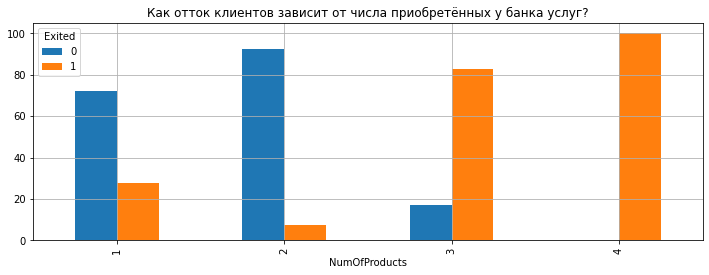

In [ ]:
# вариант средствами pandas
nop_gr.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
    title='Как отток клиентов зависит от числа приобретённых у банка услуг?'
);

Вывод: чем больше продуктов банка у клиента тем вероятнее уход.

__9.8.__ Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [635]:
# группировка данных
act_gr=churn_data.pivot_table(
    values='Surname',
    index='IsActiveMember',
    columns='Exited',
    aggfunc ='count',
    fill_value=0
)
display(act_gr)
# приведем к проценту
act_gr['sum']=act_gr['лояльный']+act_gr['ушел']
act_gr['лояльный']=act_gr['лояльный']/act_gr['sum']*100
act_gr['ушел']=act_gr['ушел']/act_gr['sum']*100
act_gr = act_gr.drop(['sum'], axis=1)
display(act_gr)

Exited,лояльный,ушел
IsActiveMember,,
0,3547,1302
1,4416,735


Exited,лояльный,ушел
IsActiveMember,,
0,73.149103,26.850897
1,85.730926,14.269074


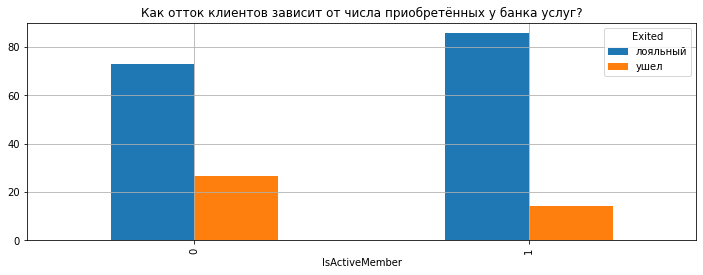

In [636]:
# вариант средствами pandas
act_gr.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
    title='Как отток клиентов зависит от числа приобретённых у банка услуг?'
);

Вывод: Признак активности клиента снижает вероятность ухода почти в 2 раза

__9.9.__ В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [677]:

# доли ушедших клиентов по странам
country_gr=churn_data.pivot_table(
    values='Surname',
    index='Geography',
    columns='Exited',
    aggfunc ='count',
    fill_value=0,
)
display(country_gr)
# приведем к проценту
country_gr['sum']=country_gr['лояльный']+country_gr['ушел']
country_gr['лояльный']=country_gr['лояльный']/country_gr['sum']*100
country_gr['ушел']=country_gr['ушел']/country_gr['sum']*100
country_gr = country_gr.drop(['sum'], axis=1)
country_gr['страна']=country_gr.index
display(country_gr)


Exited,лояльный,ушел
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


Exited,лояльный,ушел,страна
Geography,,,
France,83.845233,16.154767,France
Germany,67.556796,32.443204,Germany
Spain,83.326605,16.673395,Spain


In [680]:
#строим график
fig = px.choropleth(
    data_frame=country_gr, #DataFrame
    locations='страна', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="ушел", #от чего зависит цвет
 #   animation_frame="date", #анимационный бегунок
    #range_color=[0, 30e6], #диапазон цвета
    title='В какой стране доля ушедших клиентов больше?', #заголовок
    width=600, #ширина
    height=400, #высота
    color_continuous_scale='Reds' #палитра цветов
)

fig.show()

Вывод: в Германии больше ушедших клиентов (в процентном отношении к клиетам этой страны)